# ---------------------------- Crime dataset Analysis ----------------------------------

# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings

In [2]:
data = pd.read_csv(r'C:\Users\malay bhuniaq\OneDrive\Desktop\Jupyter Notebook Project\All Projects\crime_dataset_india.csv')

In [3]:
# Display Top 2 rows
data.head(1)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN


In [4]:
# display bottom 2 rows
data.tail(1)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
40159,40160,31-07-2024 17:00,07-31-2024 07:00,17:19:00,Delhi,193,DOMESTIC VIOLENCE,43,F,Poison,Violent Crime,7,Yes,28-09-2024 17:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


# Data Cleaning part

In [6]:
# Extract Date part in Date Reported column
data['Date Reported'] = data['Date Reported'].str.split(' ').str[0]

# Change Datatype object to Date
data['Date Reported'] = pd.to_datetime(data['Date Reported'], dayfirst=True, format='mixed')

In [7]:
# Extract Date part in Date of occurrence column
data['Date of Occurrence'] = data['Date of Occurrence'].str.split(' ').str[0]

# Change Datatype object to Date
data['Date of Occurrence'] = pd.to_datetime(data['Date of Occurrence'], dayfirst=True, format='mixed')

In [8]:
# Extract Date part in Date Case Closed column
data['Date Case Closed'] = data['Date Case Closed'].str.split(' ').str[0]

# Change Datatype object to Date
data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], dayfirst=True, format='mixed')

In [9]:
data.sample(1)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
15893,15894,2021-10-25,2021-10-24,23:01:00,Bangalore,225,EXTORTION,36,M,Poison,Other Crime,18,No,NaT


# 1) Which cities report the highest number of crimes?(Top 10)

In [10]:
Top_10_city = data['City'].value_counts().head(10)
Top_10_city.columns = ['Citys','Total Count']
Top_10_city

City
Delhi        5400
Mumbai       4415
Bangalore    3588
Hyderabad    2881
Kolkata      2518
Chennai      2493
Pune         2212
Ahmedabad    1817
Jaipur       1479
Lucknow      1456
Name: count, dtype: int64

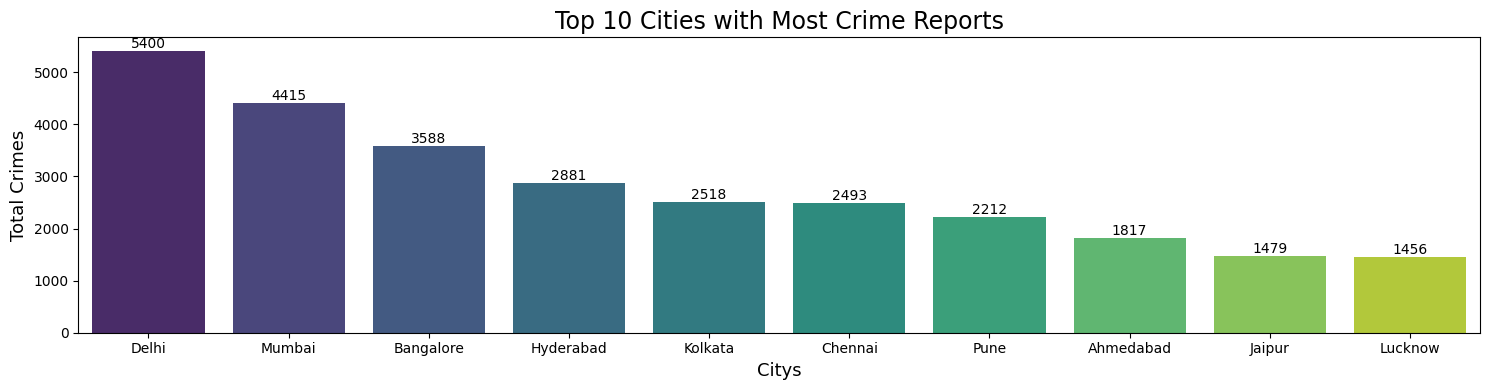

In [11]:
plt.figure(figsize=(15,4))
temp = sns.barplot(x=Top_10_city.index, y=Top_10_city.values, hue=Top_10_city.index, palette='viridis')
plt.title('Top 10 Cities with Most Crime Reports',fontsize=17)
plt.xlabel('Citys',fontsize=13)
plt.ylabel('Total Crimes',fontsize=13)
plt.tight_layout()

for i in temp.containers: 
    temp.bar_label(i)

plt.show()

# 2) Which types of crimes are most frequent?

In [12]:
top5_crime_type = data['Crime Description'].value_counts().reset_index().head(5)
top5_crime_type.columns = ['Crimes','Total']
top5_crime_type

,Crimes,Total
0,BURGLARY,1980
1,VANDALISM,1975
2,FRAUD,1965
3,DOMESTIC VIOLENCE,1932
4,FIREARM OFFENSE,1931


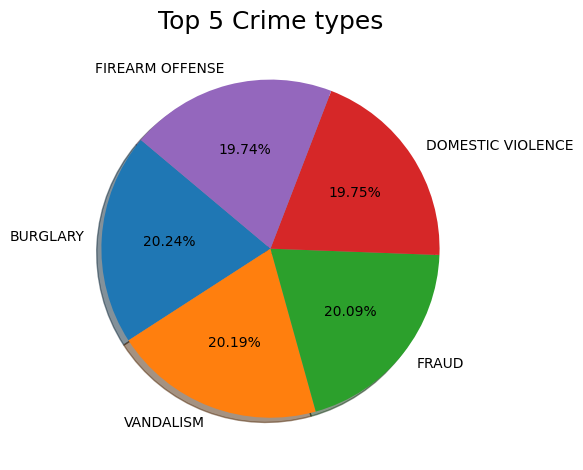

In [13]:
data['Crime Description'].value_counts().head(5).plot(kind='pie', autopct='%1.2f%%',startangle=140, shadow=True, textprops={'fontsize': 10})
plt.title('Top 5 Crime types',fontsize=18)
plt.ylabel('')
plt.tight_layout()
plt.show()

# 3) At what time of day do most crimes occur?

In [14]:
df=data

In [15]:
# Extract Hours and create new column Hour
df['Hour'] = df['Time of Occurrence'].astype(str).str.split(':').str[0].astype(int)

In [16]:
# Create a time period function
def time_period(hour):
    if pd.isna(hour):
        return None
    if hour >=5 and hour <12:
        return 'Morning'
    elif hour >=12 and hour <17:
        return 'Afternoon'
    elif hour >=17 and hour <21:
        return 'Evening'
    else:
        return 'Night'

In [17]:
# Funcion call and Create a new column Time period
df['Time_period']= df['Hour'].apply(time_period)

In [18]:
df['Time_period'].value_counts().reset_index()

,Time_period,count
0,Night,13278
1,Morning,11768
2,Afternoon,8301
3,Evening,6813


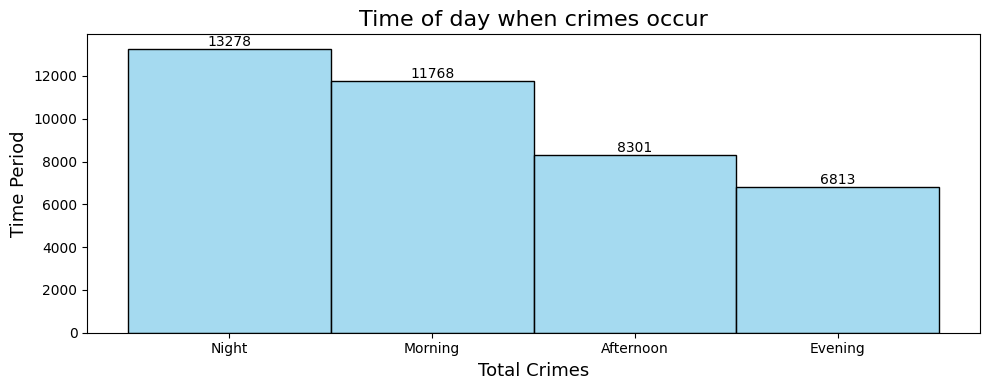

In [19]:
plt.figure(figsize=(10,4))
temp = sns.histplot(data=df['Time_period'], color="skyblue")
plt.title('Time of day when crimes occur',fontsize=16)
plt.xlabel('Total Crimes',fontsize=13)
plt.ylabel('Time Period',fontsize=13)
plt.tight_layout()

for i in temp.containers:
    temp.bar_label(i)

plt.show()

# 4) Does weapon type differ significantly between violent and non-violent crimes?

In [20]:
weapon_use = data.groupby(['Crime Domain','Weapon Used']).size().reset_index(name='Count')
P_table = weapon_use.pivot(index='Crime Domain',columns='Weapon Used', values='Count')
P_table

Weapon Used,Blunt Object,Explosives,Firearm,Knife,Other,Poison
Crime Domain,,,,,,
Fire Accident,533,546,519,575,552,547
Other Crime,3305,3275,3211,3410,3253,3274
Traffic Fatality,279,286,253,294,252,287
Violent Crime,1620,1644,1660,1556,1619,1620


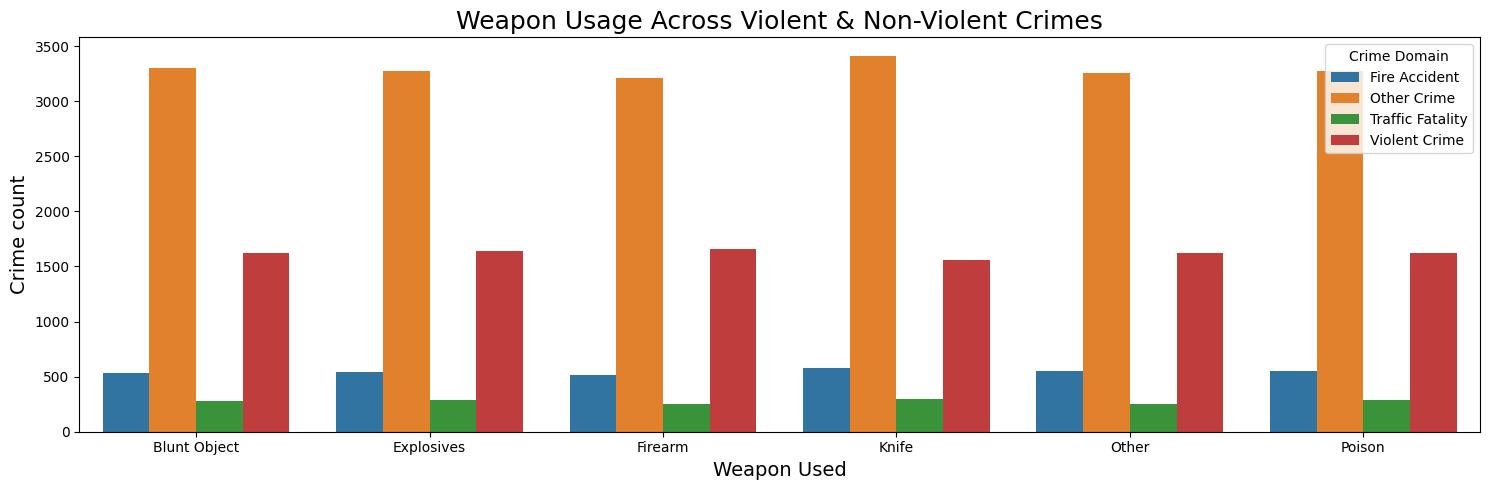

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Used', y='Count', data=weapon_use, hue='Crime Domain')
plt.title('Weapon Usage Across Violent & Non-Violent Crimes', fontsize=18)
plt.xlabel('Weapon Used', fontsize =14)
plt.ylabel('Crime count', fontsize=14)
plt.tight_layout()
plt.show()

# 5) Which age group is most affected by crimes?

In [22]:
def age_group(age):
    if pd.isna(age):
        return None
    if 0 < age <=12:
        return 'Child(1-12)'
    elif 12 < age <=18: 
        return 'Teen (13–18)'
    elif 18 < age <=30: 
        return 'Young Adult (19–30)'
    elif 30 < age <=45: 
        return 'Adult (30–45)'
    elif 45 < age <=60: 
        return 'Mid-age (45–60)'
    else:
        return 'Senior'

In [23]:
df['Age_group'] = df['Victim Age'].apply(age_group)

In [24]:
df['Age_group'].value_counts().reset_index()

,Age_group,count
0,Senior,10924
1,Adult (30–45),8667
2,Mid-age (45–60),8487
3,Young Adult (19–30),6961
4,Teen (13–18),3410
5,Child(1-12),1711


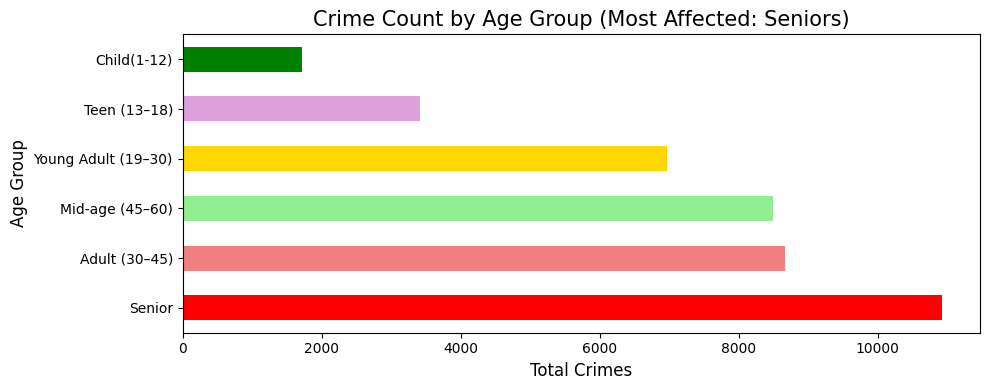

In [25]:
plt.figure(figsize=(10,4))
bar_colors = ['red', 'lightcoral', 'lightgreen', 'gold', 'plum', 'Green']
df['Age_group'].value_counts().plot(kind='barh', color=bar_colors)
plt.title('Crime Count by Age Group (Most Affected: Seniors)',fontsize=15)
plt.xlabel('Total Crimes',fontsize=12)
plt.ylabel('Age Group',fontsize=12)
plt.tight_layout()
plt.show()

# 6) Does victim gender influence crime exposure?

In [26]:
gender = data.groupby('Victim Gender')['Crime Description'].count().sort_values(ascending=False).reset_index()
gender.columns = ['Victim Gender', 'Total Crime']
gender

,Victim Gender,Total Crime
0,F,22423
1,M,13405
2,X,4332


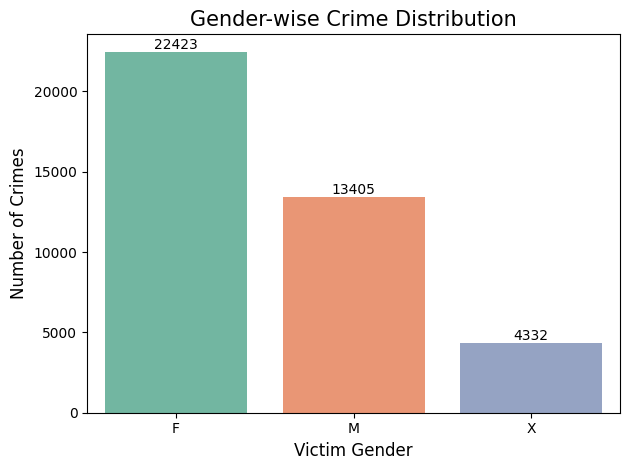

In [27]:
gen_crime = sns.barplot(x=gender['Victim Gender'], y=gender['Total Crime'], hue=gender['Victim Gender'], palette='Set2')
plt.title('Gender-wise Crime Distribution',fontsize=15)
plt.xlabel('Victim Gender',fontsize=12)
plt.ylabel('Number of Crimes',fontsize=12)
plt.tight_layout()

for i in gen_crime.containers: 
    gen_crime.bar_label(i)

plt.show()

# 7) Which cities have the highest closed vs. reported cases?

In [28]:
# Group city and case closed
Close_report = data.groupby(['City','Case Closed']).size().reset_index(name='count')

# Create Pivot Table
Table = Close_report.pivot(index='City', columns='Case Closed', values='count').fillna(0)
# Rename yes/no too Closed/not closed
Table = Table.rename(columns={'Yes':'Closed','No':'Not_Closed'})

# Find Top 7 Highest Closed and reported cases City
Table['Total']=Table.sum(axis=1) # Add Total column (Yes+No)
Top7_city = Table.sort_values(by='Total',ascending=False).head(7)
Top7_city

Case Closed,Not_Closed,Closed,Total
City,,,
Delhi,2754,2646,5400
Mumbai,2214,2201,4415
Bangalore,1829,1759,3588
Hyderabad,1422,1459,2881
Kolkata,1251,1267,2518
Chennai,1251,1242,2493
Pune,1110,1102,2212


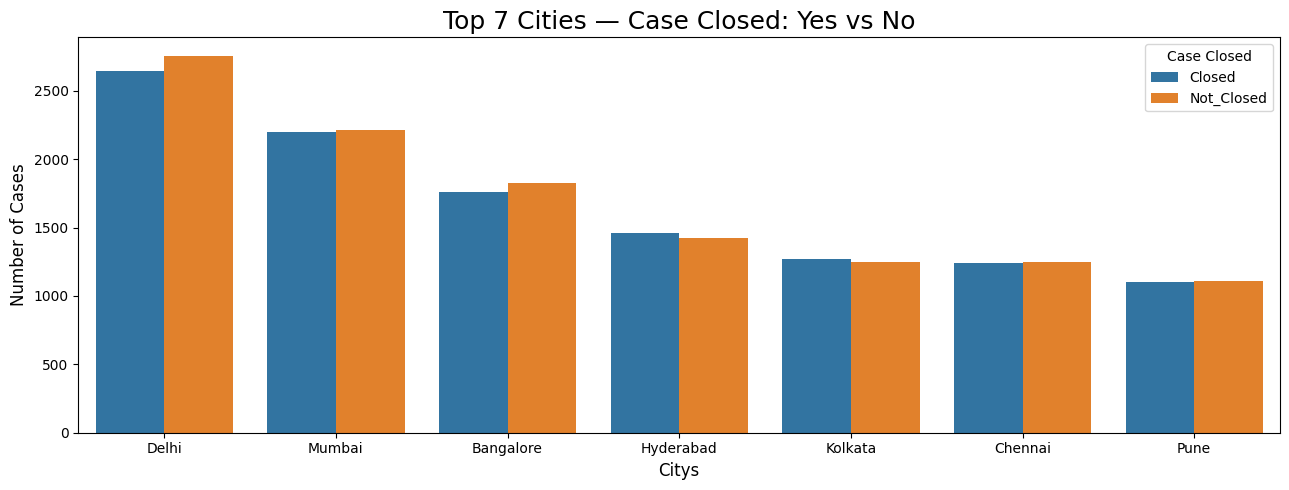

In [40]:
# Convert to Long format
plotDF = Top7_city.reset_index().melt(id_vars='City', value_name='count', var_name='Case Closed', value_vars=['Closed','Not_Closed'])

# Showing this group in barplot
plt.figure(figsize=(13,5))
sns.barplot(x='City', y='count', hue='Case Closed', data=plotDF)
plt.xlabel('Citys', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Top 7 Cities — Case Closed: Yes vs No', fontsize=18)
plt.tight_layout()
plt.show()

# 8) Is there a seasonal pattern? Which months report highest crime across cities

In [30]:
# Extract month in Date of Occurrence column
data['Months']=data['Date of Occurrence'].dt.month_name()
# Groupby Citys and Months
city_month= data.groupby(['City','Months']).size().reset_index(name='Count')
city_month

,City,Months,Count
0,Agra,April,65
1,Agra,August,66
2,Agra,December,47
3,Agra,February,71
4,Agra,January,56
...,...,...,...
343,Visakhapatnam,March,60
344,Visakhapatnam,May,71
345,Visakhapatnam,November,47
346,Visakhapatnam,October,61


In [31]:
# Get max month per city
max_rows = city_month.loc[city_month.groupby('City')['Count'].idxmax()].reset_index(drop=True)
Top7_crime_m = max_rows.sort_values(by='Count', ascending=False).head(7)
Top7_crime_m

,City,Months,Count
5,Delhi,May,489
17,Mumbai,July,429
2,Bangalore,June,338
8,Hyderabad,July,273
13,Kolkata,March,244
4,Chennai,July,239
21,Pune,March,211


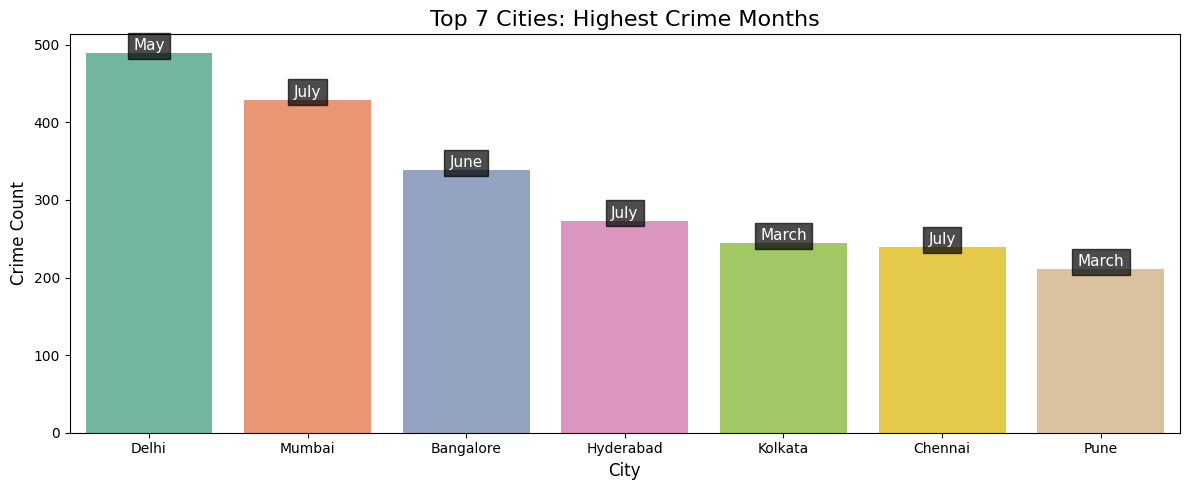

In [32]:
# visualize Top 7 Cities: Highest Crime Months
plt.figure(figsize=(12,5))
bars = sns.barplot(x='City', y='Count', data=Top7_crime_m, hue='City', palette='Set2')

# Add Month labels on bars
for bar, month in zip(bars.patches, Top7_crime_m['Months']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        month,
        ha='center',
        va='bottom',
        color='white',
        bbox=dict(facecolor='black', alpha=0.7),
        fontsize=11
    )

plt.xlabel("City",fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.title("Top 7 Cities: Highest Crime Months", fontsize=16)
plt.tight_layout()
plt.show()


# 9) Does police deployment affect case closure?

In [33]:
# Convert case closed to numeric
data['Closed']=data['Case Closed'].map({'Yes':1,'No':0})

# Check correlation
data[['Police Deployed', 'Closed']].corr()

,Police Deployed,Closed
Police Deployed,1.000000,-0.002536
Closed,-0.002536,1.000000


In [34]:
data.groupby('Closed')['Police Deployed'].mean().reset_index()

,Closed,Police Deployed
0,0,10.020102
1,1,9.992374


In [35]:
df['Deployment Level'] = pd.qcut(df['Police Deployed'], q=4, labels=['Low(1-5)', 'Medium(6-10)', 'High(11-15)', 'Very High(16-20)'])
data.groupby('Deployment Level', observed=False)['Closed'].mean().reset_index()

,Deployment Level,Closed
0,Low(1-5),0.498474
1,Medium(6-10),0.502491
2,High(11-15),0.500798
3,Very High(16-20),0.495588


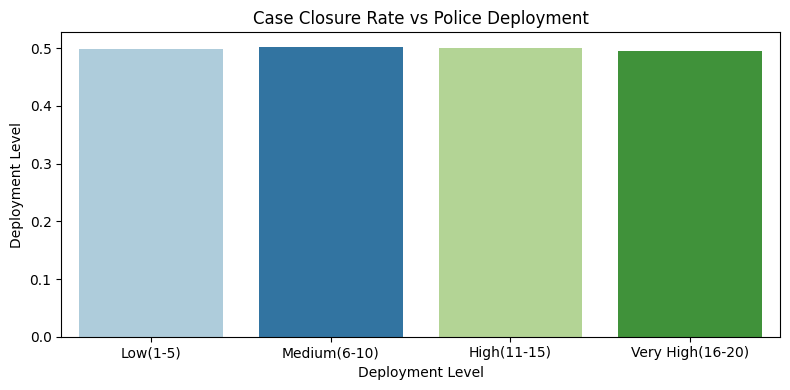

In [36]:
plt.figure(figsize=(8,4))
rate = data.groupby('Deployment Level', observed=False)['Closed'].mean().reset_index()
sns.barplot(data=rate, x="Deployment Level", y="Closed", hue="Deployment Level", palette='Paired')
plt.title("Case Closure Rate vs Police Deployment")
plt.ylabel("Closure Rate")
plt.ylabel("Deployment Level")
plt.tight_layout()
plt.show()

### ANS :-  Even if police deployment increases, the chances of closing cases do not increase.

# 10) Create a lineplots year-by-year crime reports for multiple cities?

In [37]:
# Create Top 6 crime Citys Separate table 
delhi_data= data[data['City']=='Delhi']['years'].value_counts()
mumbai_data= data[data['City']=='Mumbai']['years'].value_counts()
bangalore_data= data[data['City']=='Bangalore']['years'].value_counts()
hyderabad_data= data[data['City']=='Hyderabad']['years'].value_counts()
kolkata_data= data[data['City']=='Kolkata']['years'].value_counts()
chennai_data= data[data['City']=='Chennai']['years'].value_counts()


KeyError: 'years'

In [ ]:
# Create a function plot_city_crime_reports
def plot_city_crime_reports(city_data_dict):
    plt.figure(figsize=(20, 8))
    plt.suptitle('LinePlot year-by-year crime reports for top 6 cities', fontsize=25)
    
    for i, (city, data) in enumerate(city_data_dict.items(), start=1):
        plt.subplot(2, 3, i)
        plt.plot(data.index, data.values,
            color='red', linestyle='-', linewidth=2,
            marker='o', markersize=7
        )
        plt.title(f"{city} crime report year-by-year", fontsize=18)
        plt.xlabel("Years", fontsize=12)
        plt.ylabel("Total Crimes", fontsize=12)
        plt.grid(color='black', linestyle='dashdot', linewidth=0.5)
        plt.xticks([2020, 2021, 2022, 2023, 2024])
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_city_crime_reports({
    'Delhi': delhi_data,
    'Mumbai': mumbai_data,
    'Bangalore': bangalore_data,
    'Hyderabad': hyderabad_data,
    'Kolkata': kolkata_data,
    'Chennai':chennai_data
})